# Image Colorization Final Project
Authors: Aret Tinoco, Keshav Gupta, Hal Halberstadt

Dataset: https://www.kaggle.com/datasets/darthgera/colorization

---

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image # for resizing images

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid

import tensorflow as tf
from tensorflow.keras import models, layers, Input, Model, callbacks
from tensorflow.keras.layers import Lambda
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from IPython.display import display, HTML

Ease of reading

In [2]:
pd.set_option('display.max_columns', 200)
pd.options.display.width = 120
pd.options.display.max_colwidth = 50
display(HTML("<style>.container { width:100% !important; }</style>"))

Now to state the directory of the data to retrieve from.

In [3]:
data_dir = Path("C:/Users/areti/Downloads/colorization")
img_shape = (512, 512, 3)
# img_shape = (216, 216, 3)

test_folder_paths = ['validation_col_images/validation_color_images-v2', 'validation_bw/validation_black_white_images-v2',]
train_folder_paths = ['train_col_images/train_col_images', 'train_black_white_images-v2/train_black_white_images-v2']

In [4]:
def read_folder(subset_name, data_dir):
    subset_dir = data_dir / subset_name
    pics = subset_dir.glob('*.jpg')
    num_pics = int(len(list(pics))/15)
    print(f"#imgs {num_pics}, folder '{subset_name}'")
    X = np.zeros((num_pics, img_shape[0], img_shape[1], img_shape[2]), dtype='float32')
    y = np.empty(num_pics, dtype='object')
    for i, pic in enumerate(subset_dir.glob('*.jpg')):
        if i < num_pics:
            fruit_name = pic.name.split('-')[0]
            y[i] = fruit_name
            img = load_img(pic)
            X[i] = img
            
    # possibly reduce size of images to be able to run smoothly
    
    
#     return (X.astype('float32') / 255), y
    return (X / 255), y
#     return X.astype('uint8'), y

Next I want to read the data from the files and then just to make sure I am getting the right data from the right files

In [5]:
X_train, X_train_label = read_folder(train_folder_paths[1], data_dir)

y_train, y_train_label = read_folder(train_folder_paths[0], data_dir)

#imgs 1333, folder 'train_black_white_images-v2/train_black_white_images-v2'
#imgs 1333, folder 'train_col_images/train_col_images'


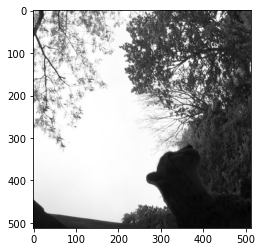

In [6]:
plt.imshow(X_train[0]);

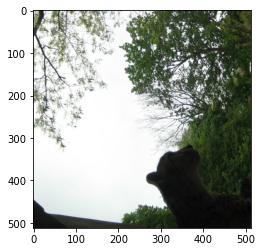

In [7]:
plt.imshow(y_train[0]);

In [8]:
X_test, X_test_label = read_folder(test_folder_paths[1], data_dir) # BW imgs
y_test, y_test_label = read_folder(test_folder_paths[0], data_dir)

#imgs 166, folder 'validation_bw/validation_black_white_images-v2'
#imgs 166, folder 'validation_col_images/validation_color_images-v2'


In [9]:
print(X_test[0].shape)
print(X_train[0].shape)
print(y_test[0].shape)
print(y_train[0].shape)

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


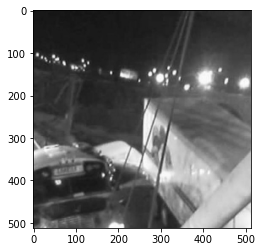

In [10]:
plt.imshow(X_test[0]);

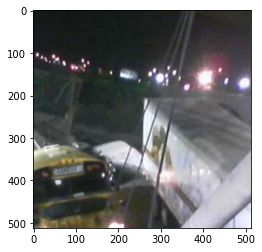

In [11]:
plt.imshow(y_test[0]);

In [15]:
K.clear_session()  # delete old models
act_fun='elu'

inputs=Input(img_shape)

# YOUR CONVOLUTIONAL LAYERS GO HERE
filters=3
k = 3
# act = layers.LeakyReLU(alpha=0.1)


# x = layers.SeparableConv2D(filters, 2, padding='same', activation=act_fun)(inputs)
# x = layers.SeparableConv2D(filters, 2, padding='same', activation=act_fun)(inputs)
# x = layers.SeparableConv2D(filters, 2, padding='same', activation=act_fun)(inputs)
# x = layers.SeparableConv2D(filters, 2, padding='same', activation=act_fun)(inputs)
x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(inputs)
x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
x = layers.SpatialDropout2D(0.5)(x)
x = layers.BatchNormalization(axis=3)(x)
x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
x = layers.MaxPooling2D(2, padding='same', strides=1)(x)

# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.MaxPooling2D(2, padding='same', strides=1)(x)

# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.MaxPooling2D(2, padding='same', strides=1)(x)

# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.MaxPooling2D(2, padding='same', strides=1)(x)

# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
# x = layers.MaxPooling2D(2, padding='same', strides=1)(x)

x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
x = layers.SpatialDropout2D(0.5)(x)
x = layers.BatchNormalization(axis=3)(x)
x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
x = layers.MaxPooling2D(2, padding='same', strides=1)(x)

x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
x = layers.SpatialDropout2D(0.5)(x)
x = layers.BatchNormalization(axis=3)(x)
x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
x = layers.Conv2D(filters, k, padding='same', activation=act_fun)(x)
x = layers.MaxPooling2D(2, padding='same', strides=1)(x)

# Flatten and output Block
embedding_model = Model(inputs, x)

In [16]:
embedding_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 512, 512, 3)       84        
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 3)       84        
                                                                 
 spatial_dropout2d (SpatialD  (None, 512, 512, 3)      0         
 ropout2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 512, 512, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 512, 512, 3)       84    

In [19]:
my_callbacks = callbacks.EarlyStopping(monitor="val_loss", patience=6, min_delta=0.2)

In [20]:
embedding_model.compile(optimizer='rmsprop', loss='mse',  metrics=tf.keras.losses.MeanSquaredError())
embedding_model.fit(X_train, y_train, callbacks=[my_callbacks],batch_size = 32, validation_data=(X_test, y_test), epochs=30)
# embedding_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/30
42/42 [==============================] - 597s 14s/step - loss: 0.1591 - mean_squared_error: 0.1586 - val_loss: 0.1168 - val_mean_squared_error: 0.1143
Epoch 2/30
42/42 [==============================] - 600s 14s/step - loss: 0.0823 - mean_squared_error: 0.0821 - val_loss: 0.0663 - val_mean_squared_error: 0.0636
Epoch 3/30
42/42 [==============================] - 648s 15s/step - loss: 0.0598 - mean_squared_error: 0.0597 - val_loss: 0.0591 - val_mean_squared_error: 0.0566
Epoch 4/30
42/42 [==============================] - 742s 18s/step - loss: 0.0556 - mean_squared_error: 0.0555 - val_loss: 0.0522 - val_mean_squared_error: 0.0499
Epoch 5/30
42/42 [==============================] - 866s 21s/step - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.0444 - val_mean_squared_error: 0.0423
Epoch 6/30
42/42 [==============================] - 886s 21s/step - loss: 0.0524 - mean_squared_error: 0.0524 - val_loss: 0.0399 - val_mean_squared_error: 0.0380
Epoch 7/30
42/42 [==========

1/1 [==============================] - 1s 779ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


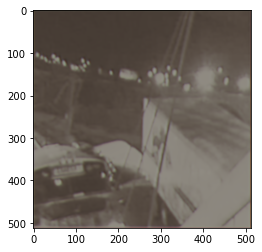

In [21]:
output = embedding_model.predict(X_test[:3])
plt.imshow(output[0]);

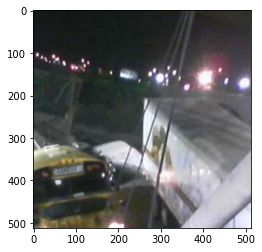

In [22]:
plt.imshow(y_test[0]);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


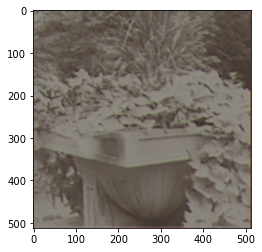

In [23]:
plt.imshow(output[1]);

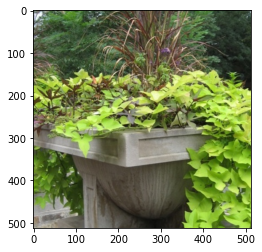

In [24]:
plt.imshow(y_test[1]);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


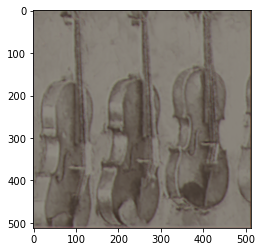

In [25]:
plt.imshow(output[2]);

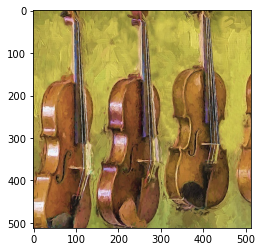

In [26]:
plt.imshow(y_test[2]);

END